# Comunicações Digitais

[Canais AWGN com multipercursos](AWGN)

## Canais AWGN

No contexto de comunicações digitais, os sinais em radiofrequência são transmitidos pelo ar livre, que pode ser modelado como um canal com ruído gaussiano branco aditivo (AWGN), de modo que no receptor, o sinal recebido $r(t)$, em geral é representado como a soma do sinal transmitido $s(t)$ atenuado por um fator $\alpha$ com uma amplitude, ou ruído, $n$ que possui uma distribuição de probabilidades gaussina:

$$r(t) = \alpha s(t) + n(t)$$

### Canais AWGN com Limitação de Banda Passante

Em um canal AWGN com limitação de banda passante, presente em situações onde são utilizados filtros contra interferências entre canais a modelagem é feita a partir do uso de um filtro linear com resposta ao impulso c(t) com parâmetros contantes, de modo que:

$$r(t) = s(t) \ast c(t) + n(t)$$

### Canais AWGN Variantes no tempo

Canais como  o canal ionosférico e acústico subaquático podem ser represetnados como um canal AWGN variante no tempo, no qual o filtro linear usado para modelar o canal com limitação de banda passante é variante no tempo, e possui parâmetros estocásticos. O sinal recebido pode ser descrito na forma:

$$r(t) = s(t) \ast c(\tau, t) + n(t)$$

### Canais AWGN com Multipercursos

Canais para comunicação móvel, inferiores e ionosféricos podem ser modelados como um canal AWGN multipercursos, onde o sinal é tranmitido por mais de um caminho, e o receptor enxerga uma soma ponderada de sinais atrasados no tempo. Nesses canais, a resposta ao impulso é descrita como:

$$c(\tau, t) = \sum_{k+1}^{L}a_k(t)\delta (\tau - \tau_k)$$

Em que L é o número de percursos, $a_k(t)$ são fatores de atenuação, provavelmente variantes no tempo, e $\tau_k$ são os atrasos referentes a cada percurso. De modo que podemos reescrever o sinal recebido como:

$$r(t) = \sum_{k+1}^{L}a_k(t) s(t-\tau_k) + n(t)$$

### Exemplo

No exemplo de canal AWGN com dois percursos abaixo, o sinal recebido é escrito como sendo:

$$r(t) = s(t) + as(t-T)$$

Em que a é uma constante real positiva e T represetna o retardo do segundo percurso

Pede-se  a norma $|R(f)|^2$ para $a = 0.1, 0.5 e 0.8$, para o caso em que o sinal transmitido é um pulo retangular rect(T), e $R(f)$ é a transformada de Fourier do sinal, e que para um pulso retangular, é dada pela função $sinc(t) = \frac{sin(t)}{t}$

Sabendo que o deslocamento de um sinal no tempo implica na multiplicação do sinal na frequência por uma exponencial, podemos escrever:

$$S_r(f) = S_t(f) + aS(f)e^{-j2\pi fT} = S_t(f)[1 + ae^{-j 2\pi fT}]$$

A norma do espectro do sinal é, portanto:

$$|R(f)|^2 = |S(f)|^2(1+ae^{-j2\pi fT})$$

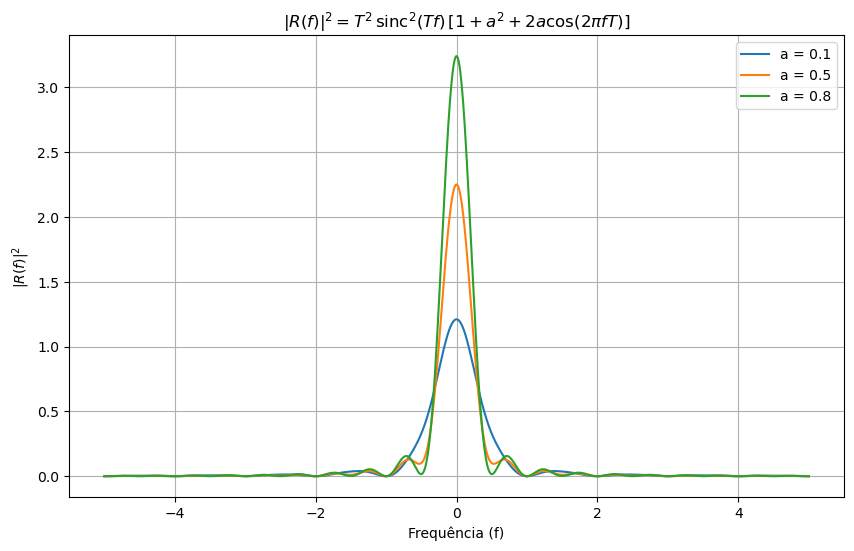

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
T = 1.0                      # duração do pulso
a_values = [0.1, 0.5, 0.8]     # diferentes valores de a
f = np.linspace(-5, 5, 1000)   # eixo de frequência

# Transformada de Fourier do pulso retangular de duração T


plt.figure(figsize=(10, 6))

for a in a_values:
    # Calcula o termo de interferência:
    interference = 1 + a * np.exp(-1j * 2 * np.pi * f * T)
    # Norma do espectro do sinal
    R_mag2 = (T * np.sinc(T * f))**2 * np.abs(interference)**2
    plt.plot(f, R_mag2, label=f'a = {a}')


plt.title(r'$|R(f)|^2 = T^2\,\mathrm{sinc}^2(Tf)\,[1+a^2+2a\cos(2\pi fT)]$')
plt.xlabel('Frequência (f)')
plt.ylabel(r'$|R(f)|^2$')
plt.legend()
plt.grid(True)
plt.show()

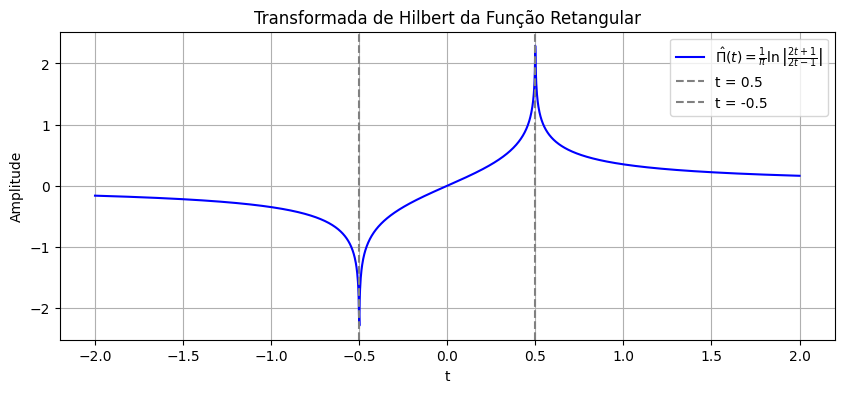

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# 1. Plot da Transformada de Hilbert da função retangular
# ======================================================

# Definindo um vetor de tempo para representar a função retangular
t = np.linspace(-2, 2, 2000)  # cobrindo uma faixa bem além do suporte (-1/2, 1/2)

# A função retangular:
# Geralmente, os pontos exatos de transição (t = ±0.5) não são atingidos com grade densa,
# mas se desejarmos podemos definir:
rect = np.where(np.abs(t) < 0.5, 1.0, 0.0)
# Tratamos os pontos exatos, se houver, conforme a definição:
rect[np.isclose(np.abs(t), 0.5)] = 0.5

# Calculando a transformada de Hilbert da função retangular usando a expressão analítica:
#    H{Π(t)} = (1/π) * ln |(2t+1)/(2t-1)|
# Observe que há singularidades em t = 0.5 e t = -0.5.
# Para evitar divisões por zero, usaremos uma máscara (threshold)
denom = 2*t - 1
vals  = (2*t + 1) / denom
threshold = 1e-6  # se |2t-1| for menor que esse valor, consideramos ponto de singularidade

hilbert_transform = (1/np.pi) * np.log(np.abs(vals))
# Onde o denominador se aproxima de zero, evitamos extrapolar:
hilbert_transform = np.where(np.abs(denom) < threshold, np.nan, hilbert_transform)

# Plotando a transformada de Hilbert
plt.figure(figsize=(10, 4))
plt.plot(t, hilbert_transform, color='blue', label=r'$\hat{\Pi}(t)=\frac{1}{\pi}\ln\left|\frac{2t+1}{2t-1}\right|$')
plt.axvline(0.5, color='gray', linestyle='--', label='t = 0.5')
plt.axvline(-0.5, color='gray', linestyle='--', label='t = -0.5')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Transformada de Hilbert da Função Retangular')
plt.legend()
plt.grid(True)
plt.show()

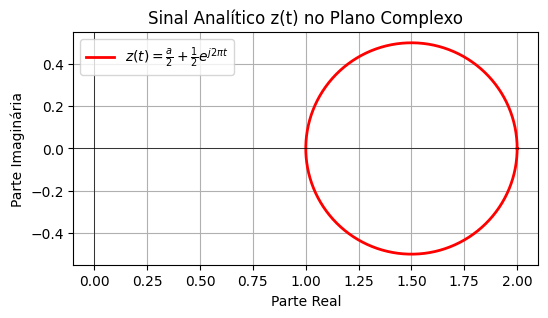

In [2]:
a = 3.0

# Definindo um vetor de tempo para cobrir uma voltinha (período 1, já que e^(j2πt) é periódico)
t2 = np.linspace(0, 1, 500)

# Cálculo do sinal analítico:
# z(t) = a/2 + (1/2)*exp(j2πt)
z = (a/2) + (0.5) * np.exp(1j * 2 * np.pi * t2)

# Plotando no plano complexo (Real vs Imaginário)
plt.figure(figsize=(6, 6))
plt.plot(z.real, z.imag, 'r-', linewidth=2, label=r'$z(t)=\frac{a}{2}+\frac{1}{2}e^{j2\pi t}$')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Sinal Analítico z(t) no Plano Complexo')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()

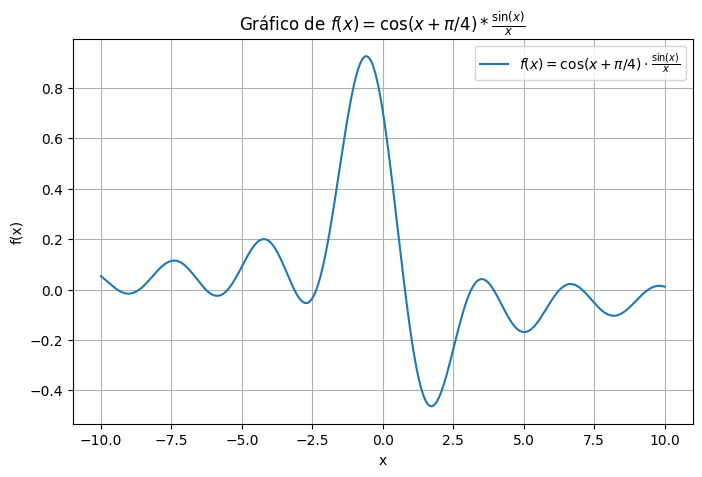

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo para x (interpretado como pivt)
x = np.linspace(-10, 10, 2000)

# Definindo a função f(x) com tratamento para x=0
# f(x) = cos(x+pi/4) * (sin(x)/x)
f = np.where(np.abs(x) < 1e-8, 
             np.cos(np.pi/4),    # Quando x é 0, sin(0)/0 -> 1, logo f(0)=cos(pi/4)
             np.cos(x + np.pi/4) * (np.sin(x) / x))

# Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, f, label=r"$f(x)=\cos(x+\pi/4)\cdot\frac{\sin(x)}{x}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico de $f(x)=\cos(x+\pi/4)*\\frac{\\sin(x)}{x}$")
plt.legend()
plt.grid(True)
plt.show()

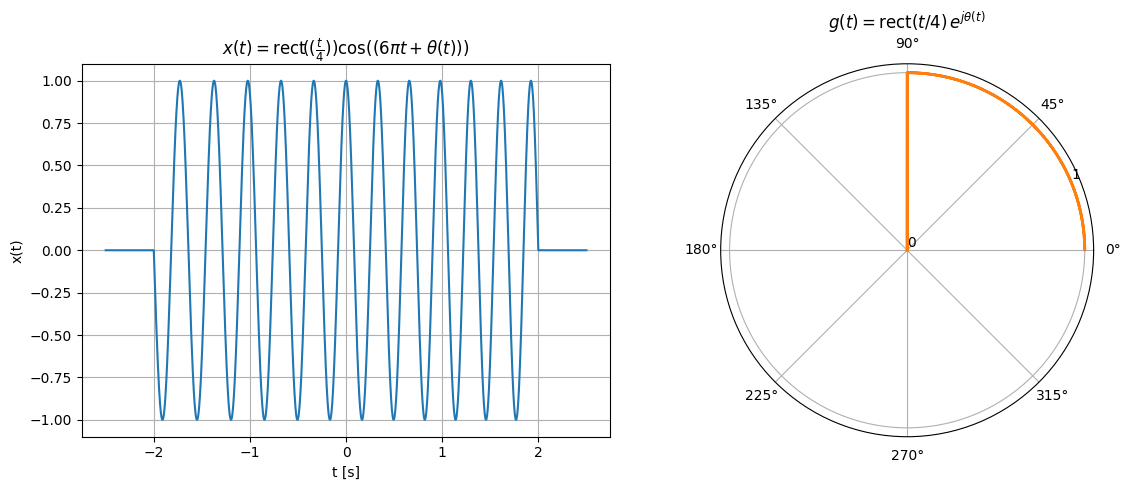

In [15]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-2.5, 2.5, 2000)

rect = np.where(np.abs(t)<2, 1, 0)
theta = np.where(np.abs(t)<2, (np.pi/8)*t**2, 0)
x = rect*np.cos(6*np.pi*t + theta)

fig = plt.figure(figsize=(12,5))

# — Subplot 1: x(t) no tempo
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(t, x, 'C0')
ax1.set_xlabel("t [s]")
ax1.set_ylabel("x(t)")
# string LaTeX válida:
ax1.set_title(r"$x(t)=\mathrm{rect}\!\bigl(\tfrac{t}{4}\bigr)\cos\!\bigl(6\pi t + \theta(t)\bigr)$".replace(r"\tfrac", r"\frac").replace(r"\bigl", "(").replace(r"\bigr", ")"))
ax1.grid(True)

# — Subplot 2: base-band em polar
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
ax2.plot(theta, rect, 'C1', lw=2)
ax2.set_title(r"$g(t)=\mathrm{rect}(t/4)\,e^{j\theta(t)}$")
ax2.set_rticks([0,1])
ax2.grid(True)

plt.tight_layout()
plt.show()

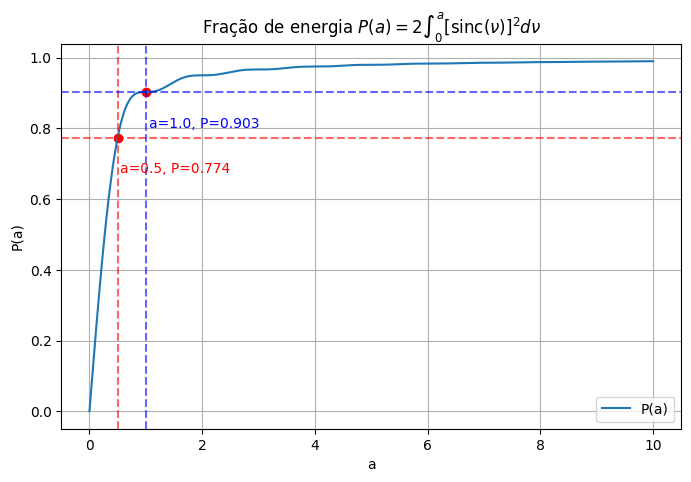

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def P(a):
    integrand = lambda nu: np.sinc(nu)**2
    return 2 * quad(integrand, 0, a)[0]

# valores de interesse
a_vals = np.linspace(0, 10, 2000)
P_vals = [P(a) for a in a_vals]

# pontos destacados
a0, a1 = 0.5, 1.0
P0, P1 = P(a0), P(a1)

plt.figure(figsize=(8, 5))
plt.plot(a_vals, P_vals, label='P(a)')
plt.scatter([a0, a1], [P0, P1], color='red')
plt.axvline(a0, color='red', linestyle='--', alpha=0.6)
plt.axhline(P0, color='red', linestyle='--', alpha=0.6)
plt.text(a0+0.05, P0-0.1, f'a=0.5, P={P0:.3f}', color='red')

plt.axvline(a1, color='blue', linestyle='--', alpha=0.6)
plt.axhline(P1, color='blue', linestyle='--', alpha=0.6)
plt.text(a1+0.05, P1-0.1, f'a=1.0, P={P1:.3f}', color='blue')

plt.title('Fração de energia $P(a)=2\\int_0^a [\\mathrm{sinc}(\\nu)]^2 d\\nu$')
plt.xlabel('a')
plt.ylabel('P(a)')
plt.grid(True)
plt.legend()
plt.show()